In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/user/1/Downloads/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.drop(df.columns[0],axis = 1,inplace = True)

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

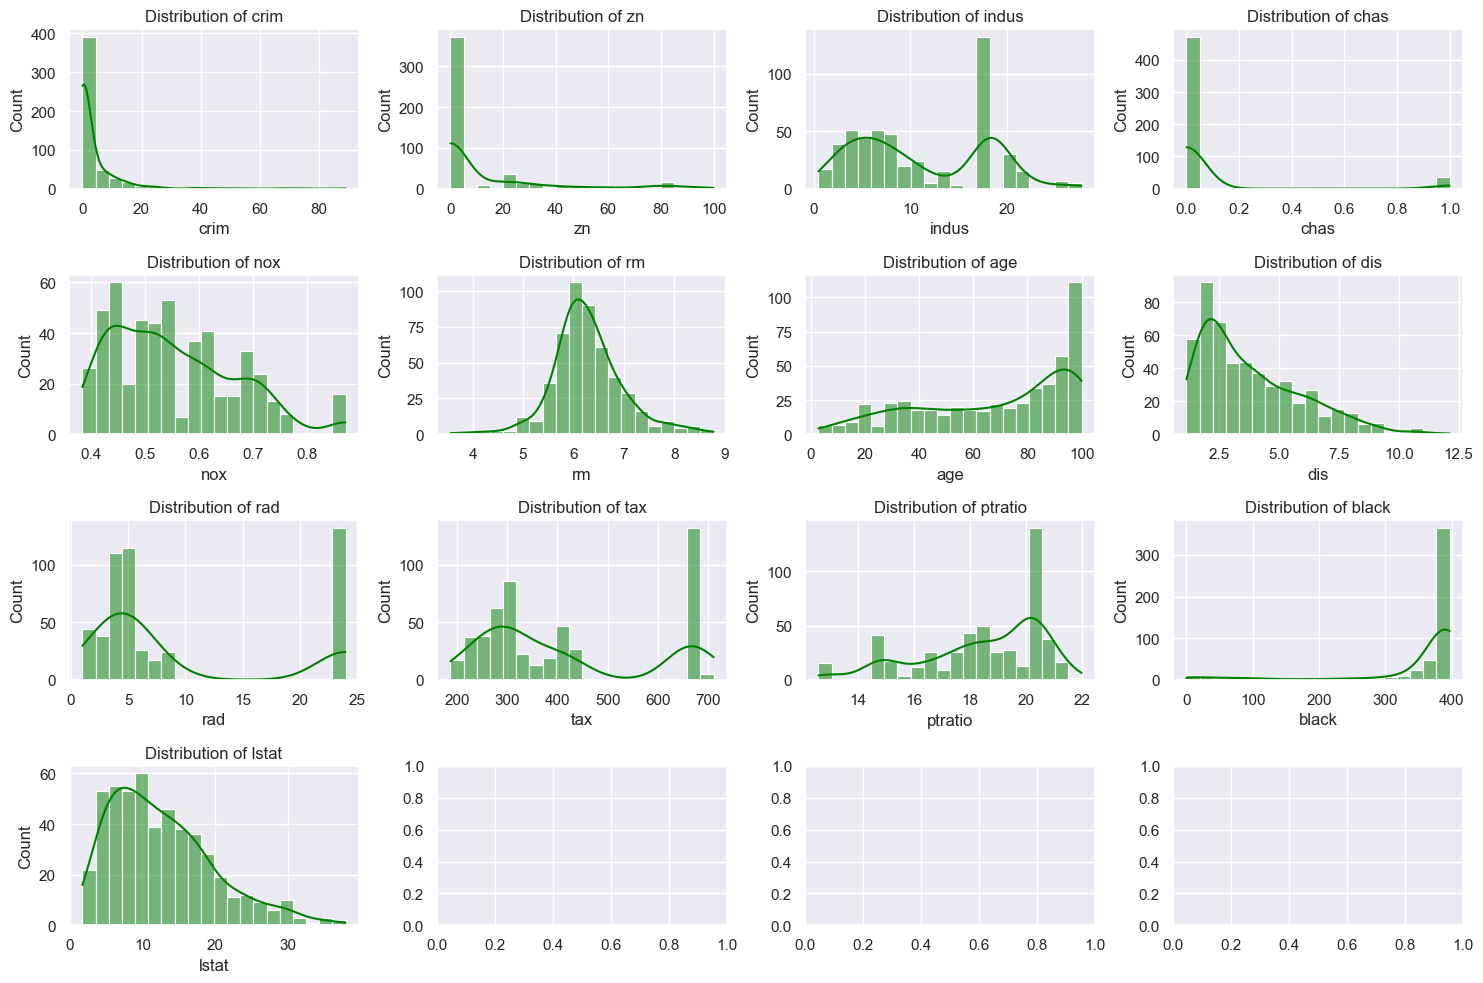

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

axes = axes.flatten()

# Plot histograms for each numeric variable
for i, col in enumerate(df.columns[:-1]):  
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5892\816594202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'],bins = 25,color = 'blue')


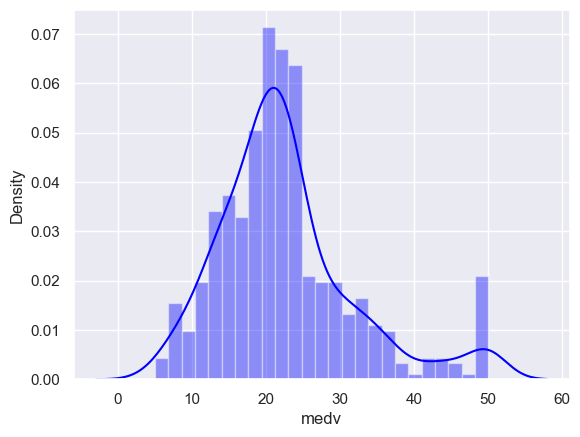

In [8]:
sns.distplot(df['medv'],bins = 25,color = 'blue')
plt.show()

In [9]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


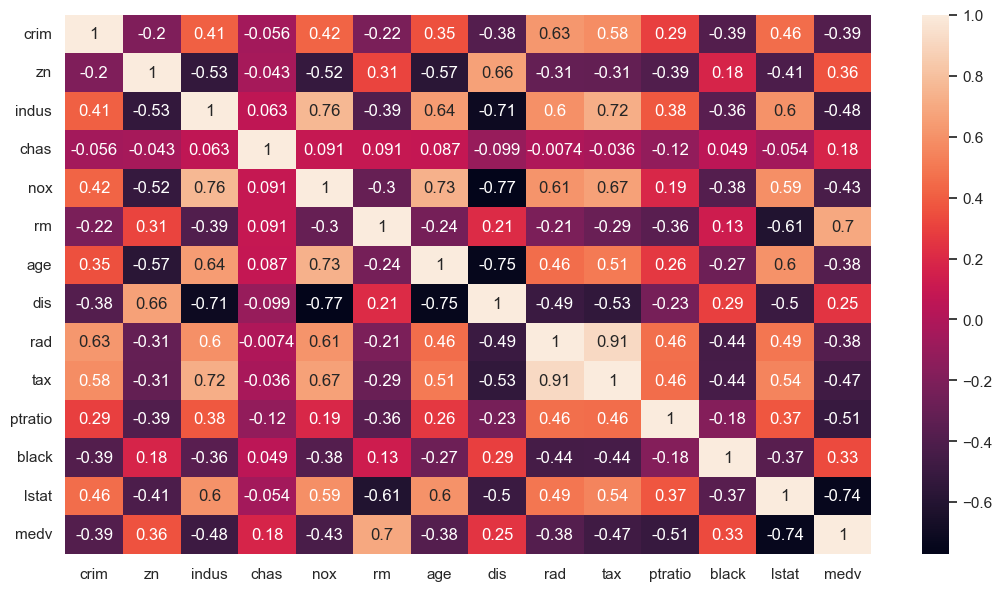

In [10]:
plt.figure(figsize = (13,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Remove outliers 

In [11]:
q = df['medv'].quantile(0.95)

df = df[df['medv'] < q]

In [12]:
df_dummies = pd.get_dummies(df['chas'], prefix = 'chas',drop_first = True)

df = pd.concat([df_dummies,df], axis = 1)
df.drop('chas', axis = 1, inplace = True)

In [13]:
df.head()

,chas_1,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Multiple Linear Regression 

In [14]:
x1 = df.drop('medv', axis = 1)
y = df['medv']

In [15]:
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     117.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          6.49e-138
Time:                        20:00:55   Log-Likelihood:                -1272.6
No. Observations:                 480   AIC:                             2573.
Df Residuals:                     466   BIC:                             2632.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2032      3.846      9.152      0.000      27.645      42.762
chas_1         0.5739      0.699      0.821      0.412      -0.800       1.948
crim          -0.1084      0.024     -4.482      0.000      -0.156      -0.061
zn             0.0349      0.011      3.223      0.001       0.014       0.056
indus         -0.0397      0.046     -0.858      0.391      -0.131       0.051
nox          -12.0375      2.844     -4.232      0.000     -17.627      -6.448
rm             2.8293      0.346      8.170      0.000       2.149       3.510
age           -0.0185      0.010     -1.845      0.066      -0.038       0.001
dis           -1.0664      0.151     -7.079      0.000      -1.362      -0.770
rad            0.2253      0.049      4.554      0.000       0.128       0.322
tax           -0.0121      0.003     -4.338      0.000      -0.018      -0.007
ptratio       -0.7588      0.099     -7.697      0.000      -0.953      -0.565
black          0.0074      0.002      3.774      0.000       0.004       0.011
lstat         -0.3732      0.039     -9.452      0.000      -0.451      -0.296
==============================================================================
Omnibus:                       76.404   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.073
Skew:                           0.912   Prob(JB):                     8.55e-32
Kurtosis:                       4.957   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
x1 = df.drop(['medv','age','indus','chas_1'], axis = 1)
y = df['medv']

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x1)
X_test = scaler.transform(x1)

In [19]:
x = sm.add_constant(x1)
reg2 = sm.OLS(y,x).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     151.9
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.61e-140
Time:                        20:01:15   Log-Likelihood:                -1275.0
No. Observations:                 480   AIC:                             2572.
Df Residuals:                     469   BIC:                             2618.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.1244      3.826      9.441      0.000      28.606      43.643
crim          -0.1087      0.024     -4.501      0.000      -0.156      -0.061
zn             0.0380      0.011      3.547      0.000       0.017       0.059
nox          -13.9415      2.610     -5.342      0.000     -19.070      -8.813
rm             2.7301      0.337      8.098      0.000       2.068       3.393
dis           -0.9651      0.141     -6.840      0.000      -1.242      -0.688
rad            0.2460      0.048      5.177      0.000       0.153       0.339
tax           -0.0134      0.003     -5.302      0.000      -0.018      -0.008
ptratio       -0.7912      0.097     -8.148      0.000      -0.982      -0.600
black          0.0074      0.002      3.732      0.000       0.003       0.011
lstat         -0.4028      0.037    -11.033      0.000      -0.475      -0.331
==============================================================================
Omnibus:                       70.879   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.070
Skew:                           0.877   Prob(JB):                     6.94e-28
Kurtosis:                       4.782   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ridge Regression

In [20]:
X = df.drop('medv', axis = 1)
y = df['medv']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
cv = RepeatedKFold(n_splits = 5,n_repeats = 3,random_state = 1)

In [24]:
ridge = RidgeCV(alphas = np.arange(0.1,10,0.1),cv = cv,scoring = 'neg_mean_squared_error')
ridge.fit(X_train,y_train)
ridge_reg_y_pred = ridge.predict(X_test)

print('Ridge Tuning Parameter: ',(ridge.alpha_))
print('Ridge Model Coefficients: ',(ridge.coef_))
print('Ridge Model Intercept: ',(ridge.intercept_))

Ridge Tuning Parameter:  8.4
Ridge Model Coefficients:  [ 0.16188656 -0.93629391  0.53812262 -0.34976194 -0.7932012   2.21259447
 -0.95049051 -1.79057619  1.32028367 -1.80231224 -1.43215719  0.79421098
 -1.94520441]
Ridge Model Intercept:  21.108072916666668


In [25]:
print('Ridge Regression Model RMSE is :',np.sqrt(mean_squared_error(y_test,ridge_reg_y_pred)))
print('Ridge Regression Model Training Score: ',ridge.score(X_train,y_train))
print('Ridge Regression Model Testing Score: ',ridge.score(X_test,y_test))

Ridge Regression Model RMSE is : 4.229276434472583
Ridge Regression Model Training Score:  0.7877402909874692
Ridge Regression Model Testing Score:  0.6428639140685304


In [26]:
pd.set_option('display.max_rows', 100)
results = pd.DataFrame({'Predicted':ridge_reg_y_pred,'Actual':y_test})
results

,Predicted,Actual
446,16.615030,14.9
0,28.184581,24.0
153,17.768667,19.4
152,18.012302,15.3
383,12.785392,12.3
302,28.082634,26.4
297,20.328639,20.3
176,25.080317,23.2
419,15.269798,8.4
385,9.444999,7.2


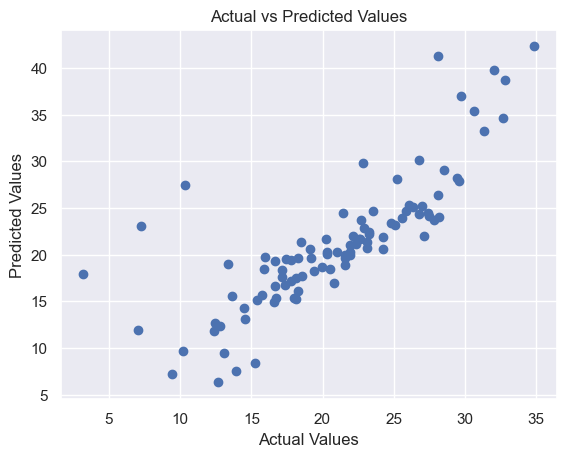

In [30]:
plt.scatter(ridge_reg_y_pred,y_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [31]:
residuals = ridge_reg_y_pred - y_test

ValueError: x and y must be the same size

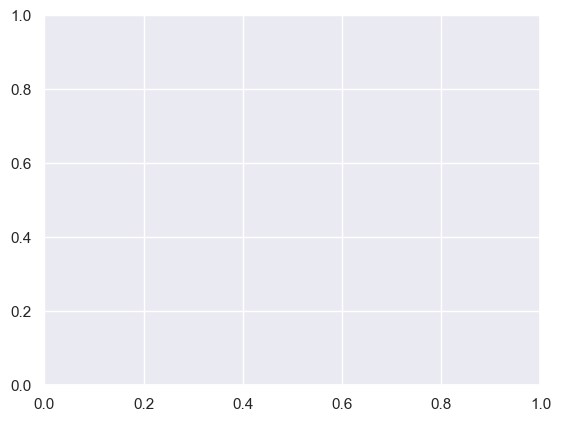

In [42]:
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Random Forests

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred = rf_regressor.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.438430312500006


In [38]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2.7273485865396827


In [39]:
pd.set_option('display.max_rows', 100)
results = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
results

,Predicted,Actual
73,24.579,23.4
440,10.085,10.5
420,14.751,16.7
298,23.701,22.5
425,9.536,8.3
177,23.403,24.6
289,24.329,24.8
401,10.879,7.2
77,22.082,20.8
468,14.295,19.1


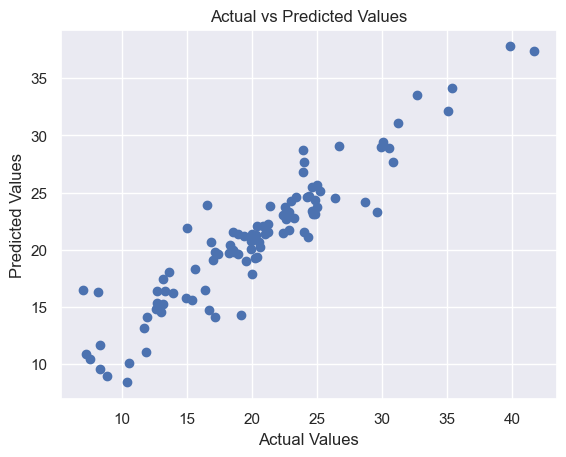

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()